In [1]:
%cd /mnt/raid0_24TB/isaiah/code/NestedGraphs/

/mnt/raid0_24TB/isaiah/code/NestedGraphs


In [2]:
import glob
import torch 
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

In [3]:
b_embs = glob.glob('inputs/Sept23/benign/emb*')
m_embs = glob.glob('inputs/Sept23/mal/emb*')

bs = []
for b in b_embs:
    bs.append(torch.load(b))

ms = []
for m in m_embs:
    ms.append(torch.load(m))

b_x = torch.cat([b for b in bs])
m_x = torch.cat([m for m in ms])

print(b_x.size())
print(m_x.size())


torch.Size([91057, 512])
torch.Size([59094, 512])


In [10]:
from graph_utils import propagate_labels

colors = []
m_graphs = []
for m in m_embs:
    with open(m.replace('emb','graph'), 'rb') as f:
        g = pickle.load(f)

    colors.append(propagate_labels(g,23))
    m_graphs.append(g)

b_graphs = []
for b in b_embs:
    with open(b.replace('emb','graph'), 'rb') as f:
        g = pickle.load(f)
    b_graphs.append(g)    

colors = torch.cat(colors).clamp(0,1)

In [20]:
def plots_dots(b_x, m_x, title):
    pca = PCA(n_components=2)
    bx = pca.fit_transform(b_x)
    x = pca.transform(m_x)

    plt.scatter(bx[:,0], bx[:,1], color='blue')
    plt.scatter(x[colors==0,0], x[colors==0,1], color='blue')
    plt.scatter(x[colors==1,0], x[colors==1,1], color='red')
    plt.title(title)
    plt.show()

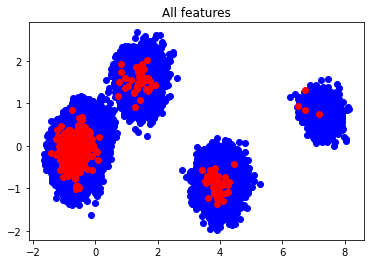

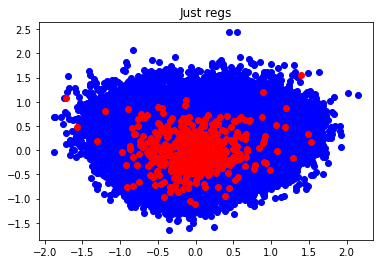

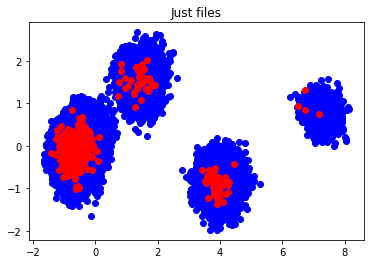

In [6]:
plots_dots(b_x, m_x, 'All features')
plots_dots(b_x[:,:256], m_x[:,:256], 'Just regs')
plots_dots(b_x[:,256:], m_x[:,256:], 'Just files')

In [19]:
b_embs = glob.glob('inputs/Sept23/benign/tgat_emb*')
m_embs = glob.glob('inputs/Sept23/mal/tgat_emb*')

bs = []
for b in b_embs:
    bs.append(torch.load(b))

ms = []
for m in m_embs:
    ms.append(torch.load(m))

b_x = torch.cat([b for b in bs])
m_x = torch.cat([m for m in ms])

print(b_x.size())
print(m_x.size())

colors = []
for m in m_embs:
    with open(m.replace('tgat_emb','graph'), 'rb') as f:
        g = pickle.load(f)

    colors.append(propagate_labels(g,23))

colors = torch.cat(colors).clamp(0,1)

torch.Size([91057, 64])
torch.Size([59094, 64])


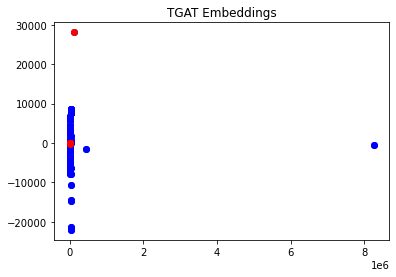

In [22]:
plots_dots(m_x, m_x, 'TGAT Embeddings')